## Team members: Alfredo Rodriguez
## Purpose: Explore student data set using the dating mining methods that we have learned throughout the course.
## Date: 8-6-24

#1.Import Packages:

In [13]:
#Import Packages:
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import datetime
!pip install pycaret
from pycaret.classification import *

#2.Read Inputs

In [2]:
from google.colab import files
uploaded = files.upload()
student_data = pd.read_csv("Student_performance_data _.csv")
student_data.info()
print(student_data.head())
student_data.describe()

Saving Student_performance_data _.csv to Student_performance_data _ (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
d

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


#3.Data Pre-processing
Some recommended data pre processing steps for the student_performance dataset:
1. Check for missing values and replace them if any.
2. Check for rows (features) which have values that vary significantly in range compared to other features. Example - Age, Normalise/Standardise them. You can make use of StandardScaler().
3. You might also want to handle outliers if there are any.
4. Divide data into train and test sets.

In [3]:
#Data Pre-processing
print(student_data.isna().sum())
student_data.fillna(student_data.median(numeric_only=True), inplace=True)
student_data['Sports'] = student_data['Sports'].astype('category')

label_encoder = LabelEncoder()
student_data['Sports'] = label_encoder.fit_transform(student_data['Sports'])
columns_to_standardize = ['StudyTimeWeekly', 'Absences']

scaler = StandardScaler()
student_data[columns_to_standardize] = scaler.fit_transform(student_data[columns_to_standardize])
print(student_data[columns_to_standardize].describe())


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64
       StudyTimeWeekly      Absences
count     2.392000e+03  2.392000e+03
mean      1.173346e-16  8.911489e-18
std       1.000209e+00  1.000209e+00
min      -1.728882e+00 -1.717694e+00
25%      -8.367399e-01 -8.908224e-01
50%      -1.178937e-02  5.417330e-02
75%       8.203737e-01  8.810445e-01
max       1.805881e+00  1.707916e+00


#4.Data Visualisation.

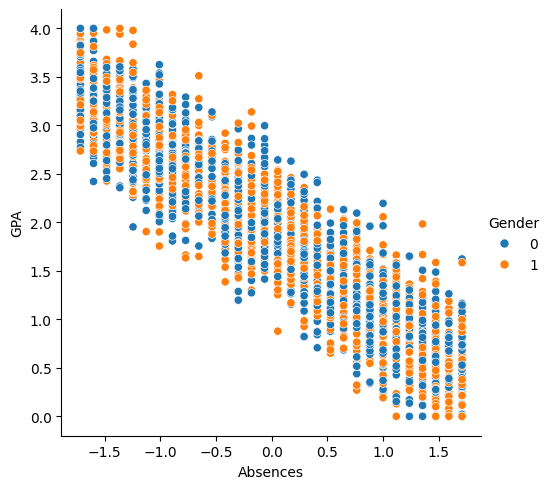

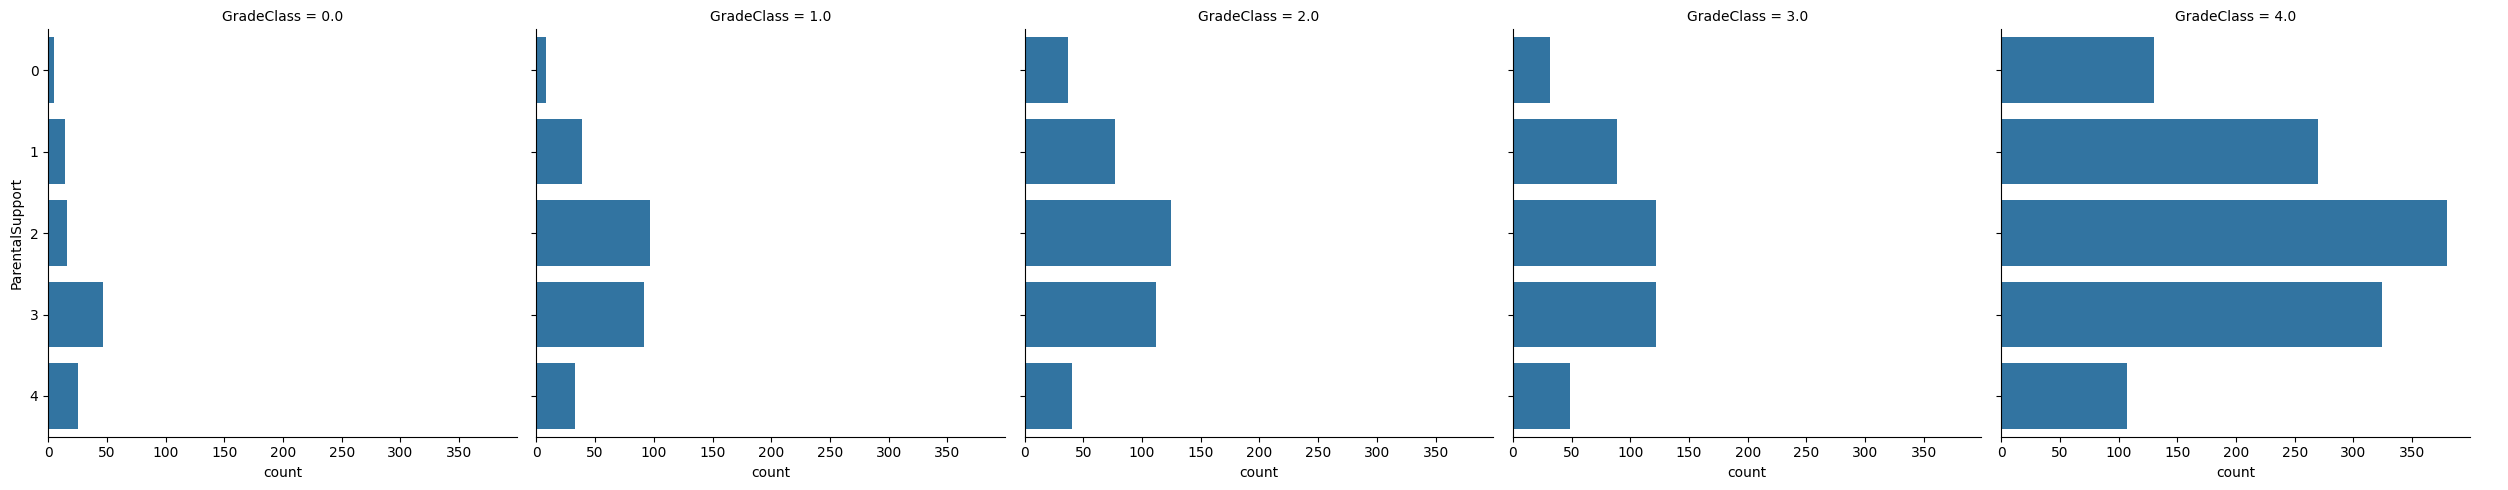

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


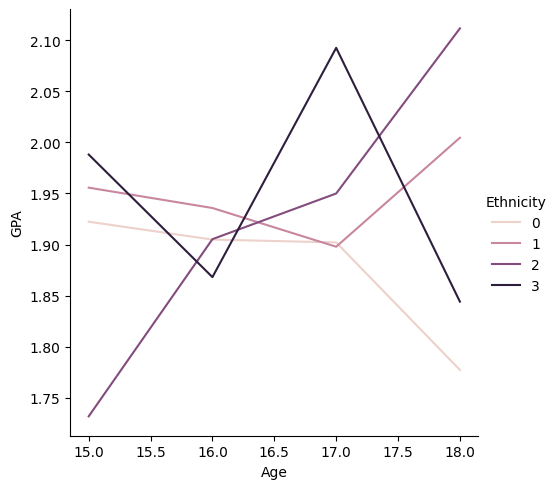

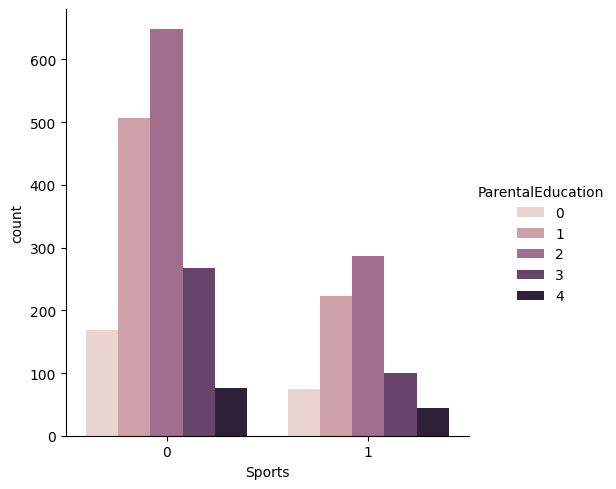

In [5]:
# Include 4 visualisations
sns.relplot(data=student_data, x='Absences', y='GPA', kind='scatter', hue='Gender')
plt.show()
sns.catplot(data=student_data, kind='count', y='ParentalSupport', col='GradeClass')
plt.show()
sns.relplot(data=student_data, x='Age', y='GPA', kind='line', hue='Ethnicity', ci=None)
plt.show()
sns.catplot(data=student_data, x='Sports', kind='count', hue='ParentalEducation')
plt.show()

#5.Feature Engineering and Selection
1. Create new features based on the existing ones, which might help you
with building the model and improve it's metrics like accuracy.
2. Out of all the available features, select the ones with the highest feature importance. Here is a reference for understanding feature importance and feature selection better - [link text](https://builtin.com/data-science/feature-importance#:~:text=Feature%20importance%20refers%20to%20techniques,to%20predict%20a%20certain%20variable). You can use Random Forest Classifer to calculate feature importances.

In [4]:
# Feature Engineering and Selection
student_data['StudyTime_Absences'] = student_data['StudyTimeWeekly'] * student_data['Absences']

y = student_data['Sports']
X = student_data.drop('Sports', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

rfc = RandomForestClassifier(n_estimators=100, class_weight='balanced')
rfc.fit(X_train, y_train)
rfcPred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfcPred))
print(classification_report(y_test,rfcPred))
rfAcc = accuracy_score(y_test,rfcPred) * 100
rfAcc = round(rfAcc, 2)
print("Accuracy: {rfAcc}%".format(rfAcc=rfAcc))

(1602, 15) (790, 15)
(1602,) (790,)
[[534  23]
 [218  15]]
              precision    recall  f1-score   support

           0       0.71      0.96      0.82       557
           1       0.39      0.06      0.11       233

    accuracy                           0.69       790
   macro avg       0.55      0.51      0.46       790
weighted avg       0.62      0.69      0.61       790

Accuracy: 69.49%


#6.Model Building
1. Build and train at least 3 ML models for Classification using the most important features derived from the last step and evaluate their performance using various evaluation metrics like accuracy and precision -
2. Follow this video for any additional help [link text](https://www.youtube.com/watch?v=XmSlFPDjKdc).
3. We strongly recommend you use PyCaret as it reduces the requered code drastically. Here is their website [link text](https://pycaret.gitbook.io/docs) and a YT video [link text](https://www.youtube.com/watch?v=sL-4rWuEiVw).

In [14]:
# Model Building and Training
#KNN
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn.fit(X_train, y_train)
knnPred = knn.predict(X_test)
print(confusion_matrix(y_test, knnPred))
print(classification_report(y_test,knnPred))
knnAcc = accuracy_score(y_test,knnPred) * 100
knnAcc = round(knnAcc, 2)
print("Accuracy: {knnAcc}%".format(knnAcc=knnAcc))

#DTC
class_weights = {0: 1, 1: 50}
dt = DecisionTreeClassifier(random_state=0, criterion='entropy', class_weight=class_weights)
dt.fit(X_train, y_train)
dtPred = dt.predict(X_test)
print(confusion_matrix(y_test, dtPred))
print(classification_report(y_test,dtPred))
dtAcc = accuracy_score(y_test,dtPred) * 100
dtAcc = round(dtAcc, 2)
print("Accuracy: {dtAcc}%".format(dtAcc=dtAcc))

#AdaBoost *used ChatGPT to boost DTC as hyperparameter tuning
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=150, random_state=0)
ada.fit(X_train, y_train)
adaPred = ada.predict(X_test)
print(confusion_matrix(y_test, adaPred))
print(classification_report(y_test, adaPred))

adaAcc = accuracy_score(y_test, adaPred) * 100
adaAcc = round(adaAcc, 2)
adaPrecision = precision_score(y_test, adaPred) * 100
adaPrecision = round(adaPrecision, 2)
adaRecall = recall_score(y_test, adaPred) * 100
adaRecall = round(adaRecall, 2)
adaF1 = f1_score(y_test, adaPred) * 100
adaF1 = round(adaF1, 2)
print("Accuracy: {adaAcc}%".format(adaAcc=adaAcc))

[[392 165]
 [163  70]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       557
           1       0.30      0.30      0.30       233

    accuracy                           0.58       790
   macro avg       0.50      0.50      0.50       790
weighted avg       0.59      0.58      0.59       790

Accuracy: 58.48%
[[397 160]
 [155  78]]
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       557
           1       0.33      0.33      0.33       233

    accuracy                           0.60       790
   macro avg       0.52      0.52      0.52       790
weighted avg       0.60      0.60      0.60       790

Accuracy: 60.13%
[[507  50]
 [166  67]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       557
           1       0.57      0.29      0.38       233

    accuracy                           0.73       790
   macro avg       0.66  

#7.Hyperparameter Tuning
1. Hyperparameter tuning is one of the most important steps in the ML model pipeline. Here is a reference video if you need additional help - [link text](https://www.youtube.com/watch?v=sL-4rWuEiVw).
2. Select the model with the best performance from the previous step.
3. After evaluating the model's performance in the previous step, you can try evaluating the model again after Hyperparameter Tuning and you will witness a spike in it's performance.
4. You can make use of PyCaret here again, to simplify the task!

In [11]:
# Hyperparameter Tuning
clf_setup = setup(data=student_data, target='Sports',
                  numeric_features=['StudyTimeWeekly', 'Absences'],
                   normalize=True)

best_model = compare_models()

,Description,Value
0,Session id,8873
1,Target,Sports
2,Target type,Binary
3,Original data shape,"(2392, 16)"
4,Transformed data shape,"(2392, 16)"
5,Transformed train set shape,"(1674, 16)"
6,Transformed test set shape,"(718, 16)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7545,0.7500,0.3938,0.6651,0.4924,0.3446,0.3664,0.0470
ridge,Ridge Classifier,0.7467,0.7496,0.3407,0.6663,0.4485,0.3060,0.3363,0.0460
lr,Logistic Regression,0.7461,0.7480,0.3368,0.6651,0.4446,0.3028,0.3334,0.1290
qda,Quadratic Discriminant Analysis,0.7288,0.7210,0.3940,0.5789,0.4666,0.2944,0.3052,0.0920
svm,SVM - Linear Kernel,0.7186,0.7067,0.4095,0.5663,0.4661,0.2836,0.2954,0.0510
ada,Ada Boost Classifier,0.7007,0.6434,0.1045,0.5165,0.1707,0.0829,0.1198,0.4090
nb,Naive Bayes,0.6965,0.4949,0.0000,0.0000,0.0000,0.0000,0.0000,0.0490
dummy,Dummy Classifier,0.6965,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0990
lightgbm,Light Gradient Boosting Machine,0.6959,0.6496,0.2818,0.5022,0.3588,0.1802,0.1942,0.5120
rf,Random Forest Classifier,0.6935,0.6161,0.0748,0.4710,0.1280,0.0495,0.0810,0.5300


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

#8.Model Evaluation and Prediction
1. Evaluate the tuned model's performance on the test or validation set and make a prediction with a hold out set of data.

In [12]:
# Model Evaluation
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7340,0.7405,0.3807,0.5971,0.4650,0.2993,0.3127


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Music,Volunteering,GPA,GradeClass,StudyTime_Absences,Sports,prediction_label,prediction_score
2291,3292,18,1,0,1,1.488662,-0.654573,0,3,0,0,0,2.702959,0.0,-0.974438,1,0,0.7840
2202,3203,17,0,0,2,1.372054,-1.245196,0,4,0,0,0,3.115251,3.0,-1.708475,0,0,0.8753
1549,2550,18,1,2,2,0.834536,0.644796,0,3,0,0,1,1.580050,4.0,0.538105,0,0,0.5564
1503,2504,17,1,2,2,-1.220064,-1.008947,0,2,0,0,0,2.465117,3.0,1.230979,0,0,0.6806
1716,2717,18,1,2,1,1.740646,0.408547,0,4,0,1,1,1.874158,4.0,0.711135,0,0,0.8701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,2180,17,1,1,2,-0.606358,-0.890822,1,2,0,1,1,2.640476,2.0,0.540157,0,0,0.8351
1089,2090,16,0,1,3,-1.679706,-0.182076,0,3,0,0,0,1.794860,4.0,0.305833,0,0,0.6796
966,1967,15,1,2,1,0.552964,-0.063951,0,2,0,0,1,2.105309,3.0,-0.035363,1,1,0.6237
1061,2062,15,1,0,1,1.076170,-1.008947,0,4,1,1,0,3.460885,1.0,-1.085799,0,0,0.6315


In [15]:
print("Tuned Model Performance on Validation Set:")
print(f"Accuracy of my model is {adaAcc}") # Replace Accuracy in the brackets with the actual variable
print(f"Precision of my model is {adaPrecision}") # Replace Precision in the brackets with the actual variable
print(f"Recall of my model is {adaRecall}") # Replace Recall in the brackets with the actual variable
print(f"F1 Score of my model is {adaF1}") # Replace F1 in the brackets with the actual variable

Tuned Model Performance on Validation Set:
Accuracy of my model is 72.66
Precision of my model is 57.26
Recall of my model is 28.76
F1 Score of my model is 38.29
